In [1]:
#Mengimport library
import pandas as pd
from sklearn.model_selection import train_test_split
#Import library KNN
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#Membaca dataset
dataset_credit_scoring = pd.read_csv('credit_scoring.csv')
#Membuat dataset
dataset = dataset_credit_scoring[['pendapatan_setahun_juta', 'kpr_aktif', 'durasi_pinjaman_bulan', 'jumlah_tanggungan', 'rata_rata_overdue', 'risk_rating']]
#Mengubah data kpr_aktif menjadi tipe integer: 'YA' = 1 dan 'TIDAK' = 0
dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
#Mengubah data rata_rata_overdue menjadi numerik
mapping_dict = {
	"rata_rata_overdue": {
		"46 - 60 days": 60,
		"0 - 30 days": 30,
		"31 - 45 days": 45,
		"61 - 90 days": 90,
		"> 90 days": 91
	}
}
dataset = dataset.replace(mapping_dict)
#Menghapus kolom pendapatan_setahun_juta dan durasi_pinjaman_bulan
dataset = dataset.drop(['pendapatan_setahun_juta','durasi_pinjaman_bulan'], axis=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_27748\3886581744.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_27748\3886581744.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['kpr_aktif'] = dataset['kpr_aktif'].replace(['YA', 'TIDAK'], [1, 0])
C:\Users\Asus\AppData\Local\Temp\ipykernel_27748\3886581744.py:17: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [4]:
#Input variabel x dengan drop kolom risk_rating, karena kolom risk_rating digunakan sebagai lavel (y) (dependen)
x = dataset.drop(['risk_rating'], axis=1)
#Input variabel y dengan drop kolom label
y = dataset['risk_rating'].astype('category')
#Membagi data training dan data testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [5]:
#Membuat Objek model_knn
model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(x_train, y_train)
#Menjalankan data testing
y_predict = model_knn.predict(x_test)

1.0


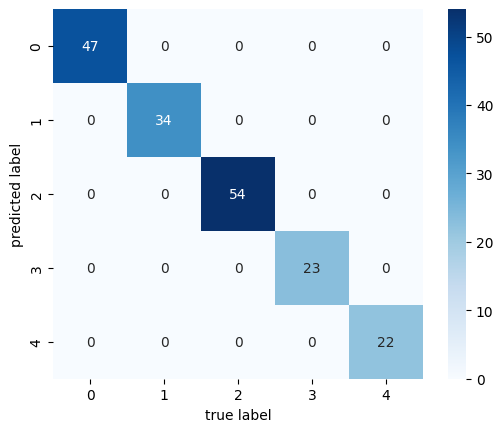

In [6]:
#Menampilkan akurasi model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_predict))

#Melakukan evaluasi model dengan confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm.T, square=True, annot=True, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()